In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
from shapely.geometry import Point

VISUALIZATION GEOPANDAS

In [9]:
'''
This script dumbs the first 36.000 values of the gps and the output of ekf to shapefiles.
You can save these values as line or points depending on the visualization you want.
'''
# df = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/fusion_camera_gps_imu_without_Eigen/cmake-build-debug/output_reordered_final_merge_new2.csv')
df = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/fusion_camera_gps_imu_without_Eigen/cmake-build-debug/output_reordered_final_merge_new.csv')
# df = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/fusion_camera_gps_imu_without_Eigen/cmake-build-debug/output_reordered_final_merge.csv')
# df = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/fusion_camera_gps_imu_without_Eigen/cmake-build-debug/output_reordered_final_merge_2_ekfs2.csv')
# df = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/final_ekf_without_Eigen/cmake-build-debug/output_GPS_IMU.csv')
# df = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/final_ekf_hav_cpp/cmake-build-debug/output_GPS_IMU_new.csv')

gps_x = df['easting']
gps_y = df['northing']
yaw = df['yaw']
state_x = df['state_x']
state_y = df['state_y']
state_yaw = df['state_yaw']  

#[12000:22305]
gps_x_n = gps_x.values[:36000]
gps_y_n = gps_y.values[:36000]
yaw_n = yaw.values[:36000]  # Extracting the yaw values
state_x_n = state_x.values[:36000]
state_y_n = state_y.values[:36000]
state_yaw_n = state_yaw.values[:36000]  # Extracting the yaw values

def dump_to_shapefile(longitudes, latitudes, out_dir, geom_type="line"):
    geometry = []
    if geom_type == "point":
        for i in range(1, len(longitudes)):
            lon, lat = longitudes[i], latitudes[i]
            lon_prev, lat_prev = longitudes[i - 1], latitudes[i - 1]
            geometry.append(Point(lon, lat))

    elif geom_type == "line":   
        for i in range(1, len(longitudes)):
            lon, lat = longitudes[i], latitudes[i]
            lon_prev, lat_prev = longitudes[i - 1], latitudes[i - 1]
            geometry.append(
                LineString([
                    (lon_prev, lat_prev),
                    (lon, lat)
                ])
            )
    
    df = gpd.GeoDataFrame(geometry=geometry)
    df.to_file(
        driver='ESRI Shapefile',
        filename=out_dir
    )

# observed
dump_to_shapefile(gps_x_n, gps_y_n, 'shapefiles/gps_new1', geom_type="point")

# estimated
dump_to_shapefile(state_x_n, state_y_n, 'shapefiles/kalman_new92', geom_type="point") 


In [16]:
'''
This script is the same as above with the addition that can match each landmark to one unique colour.
This can be used in the visualiazion below.
'''

import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Load the CSV data into a DataFrame
# df = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/fusion_camera_gps_imu_without_Eigen/cmake-build-debug/output_reordered_final_merge_new2.csv')
df = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/fusion_camera_gps_imu_without_Eigen/cmake-build-debug/output_reordered_final_merge_new.csv')
# df = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/fusion_camera_gps_imu_without_Eigen/cmake-build-debug/output_reordered_final_merge.csv')
# df = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/fusion_camera_gps_imu_without_Eigen/cmake-build-debug/output_reordered_final_merge_2_ekfs.csv')
# df = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/fusion_camera_gps_imu_without_Eigen/cmake-build-debug/output_reordered_final_merge_2_ekfs2.csv')
# df_lidar = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/fusion_camera_gps_imu_without_Eigen/cmake-build-debug/lidar_gt_qgis_utm.csv')
df_lidar = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/fusion_camera_gps_imu_without_Eigen/cmake-build-debug/lidar_gt_rtk_utm2.csv')

# Extract the necessary columns
gps_x = df['easting']
gps_y = df['northing']
state_x = df['state_x']
state_y = df['state_y']
obs_e = df['obs_e']
obs_n = df['obs_n']
lidar_east = df['lidar_easting']
lidar_north = df['lidar_northing']
landmark_east = df_lidar['easting']
landmark_north = df_lidar['northing ']
gt_e = df['gt_e']
gt_n = df['gt_n']
df.at[0, 'gt_e'] = np.nan
df.at[0, 'gt_n'] = np.nan

# Filter the data based on the condition (non-NaN values)
filtered_indices = df.index[~obs_e.isna()].values

# Divide the indices into three parts
part1_indices = filtered_indices[(filtered_indices > 0) & (filtered_indices < 12000)]
part2_indices = filtered_indices[(filtered_indices >= 12000) & (filtered_indices < 22305)]
part3_indices = filtered_indices[filtered_indices >= 22305]

# Extract the data for each part
part1_gps_x = gps_x.loc[part1_indices ]
part1_gps_y = gps_y.loc[part1_indices ]
part1_state_x = state_x.loc[part1_indices ]
part1_state_y = state_y.loc[part1_indices ]
part1_lidar_easting = lidar_east.loc[part1_indices]
part1_lidar_northing = lidar_north.loc[part1_indices]
part1_landmark_east = gt_e.loc[part1_indices]
part1_landmark_north = gt_n.loc[part1_indices]
part1_obs_e = obs_e.loc[part1_indices]
part1_obs_n = obs_n.loc[part1_indices]


part2_gps_x = gps_x.loc[part2_indices]
part2_gps_y = gps_y.loc[part2_indices]
part2_state_x = state_x.loc[part2_indices]
part2_state_y = state_y.loc[part2_indices]
part2_lidar_easting = lidar_east.loc[part2_indices]
part2_lidar_northing = lidar_north.loc[part2_indices]
part2_landmark_east = gt_e.loc[part2_indices]
part2_landmark_north = gt_n.loc[part2_indices]
part2_obs_e = obs_e.loc[part2_indices]
part2_obs_n = obs_n.loc[part2_indices]

part3_gps_x = gps_x.loc[part3_indices]
part3_gps_y = gps_y.loc[part3_indices]
part3_state_x = state_x.loc[part3_indices]
part3_state_y = state_y.loc[part3_indices]

# Get unique 'landmark_east' values
unique_landmark_easting = df_lidar['easting'].unique()
# Manually defined list of as needed distinguishable colors
colors = [
    '#e6194B', '#3cb44b', '#ffe119', '#4363d8', 
    '#f58231', '#42d4f4', '#f032e6', '#fabebe', 
    '#469990', '#e6beff', '#9A6324', '#800000', '#aaffc3', '#a9a9a9', '#a9a9a9', '#a9a9a9', '#aaffc3', '#a9a9a9', '#a9a9a9', '#a9a9a9', 
    '#aaffc3', '#a9a9a9', '#a9a9a9', '#a9a9a9', '#aaffc3', '#a9a9a9', '#a9a9a9', '#a9a9a9', '#aaffc3', '#a9a9a9', '#a9a9a9', '#a9a9a9', 
    '#aaffc3', '#a9a9a9', '#a9a9a9', '#a9a9a9', '#aaffc3', '#a9a9a9'
]
landmark_color_map = {}
for i, value in enumerate(unique_landmark_easting):
    landmark_color_map[value] = colors[i]
    
def dump_to_shapefile(longitudes, latitudes, out_dir, geom_type="line", colors=None):
    geometry = []
    df_colors = []

    if geom_type == "line":
        for i in range(len(longitudes) - 1):
            lon, lat = longitudes.iloc[i], latitudes.iloc[i]
            lon_next, lat_next = longitudes.iloc[i + 1], latitudes.iloc[i + 1]
            geometry.append(
                LineString([
                    (lon, lat),
                    (lon_next, lat_next)
                ])
            )
    elif geom_type == "point":
        for i in range(len(longitudes)):
            lon, lat = longitudes.iloc[i], latitudes.iloc[i]
            geometry.append(Point(lon, lat))
            if colors:
                df_colors.append(colors[lon])

    df = gpd.GeoDataFrame(geometry=geometry)
    if colors:
        df['color'] = df_colors

    df.to_file(
        driver='ESRI Shapefile',
        filename=out_dir
    )

def dump_to_shapefile2(lidar_gt_e, longitudes, latitudes, out_dir, geom_type="line", colors=None):
    geometry = []
    df_colors = []

    if geom_type == "line":
        for i in range(len(longitudes) - 1):
            lon, lat = longitudes.iloc[i], latitudes.iloc[i]
            lon_next, lat_next = longitudes.iloc[i + 1], latitudes.iloc[i + 1]
            geometry.append(
                LineString([
                    (lon, lat),
                    (lon_next, lat_next)
                ])
            )
            df_colors.append(colors[lidar_gt_e.iloc[i]])
        
    elif geom_type == "point":
        for i in range(len(longitudes)):
            lon, lat = longitudes.iloc[i], latitudes.iloc[i]
            geometry.append(Point(lon, lat))
            df_colors.append(colors[lidar_gt_e.iloc[i]])

    df = gpd.GeoDataFrame(geometry=geometry)
    if colors:
        df['color'] = df_colors

    df.to_file(
        driver='ESRI Shapefile',
        filename=out_dir
    )

"""
Lidar-->lidar easting/northing (poy pistueoyme eimaste apo lidar) 
"""
# Dumping landmarks to shapefiles with colors
dump_to_shapefile(landmark_east, landmark_north, 'shapefiles/landmarks', geom_type="point", colors=landmark_color_map)
dump_to_shapefile2(part1_landmark_east, part1_lidar_easting, part1_lidar_northing, 'shapefiles/lidar_new23', geom_type="point", colors=landmark_color_map)
# Dump trajectories to shapefiles
# dump_to_shapefile(part1_gps_x, part1_gps_y, 'shapefiles/gps', geom_type="point")
# dump_to_shapefile(part1_state_x, part1_state_y, 'shapefiles/kalman', geom_type="point")

# dump_to_shapefile(landmark_east, landmark_north, 'shapefiles/landmarks', geom_type="point")
# dump_to_shapefile(part1_lidar_easting, part1_lidar_northing, 'shapefiles/lidar')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


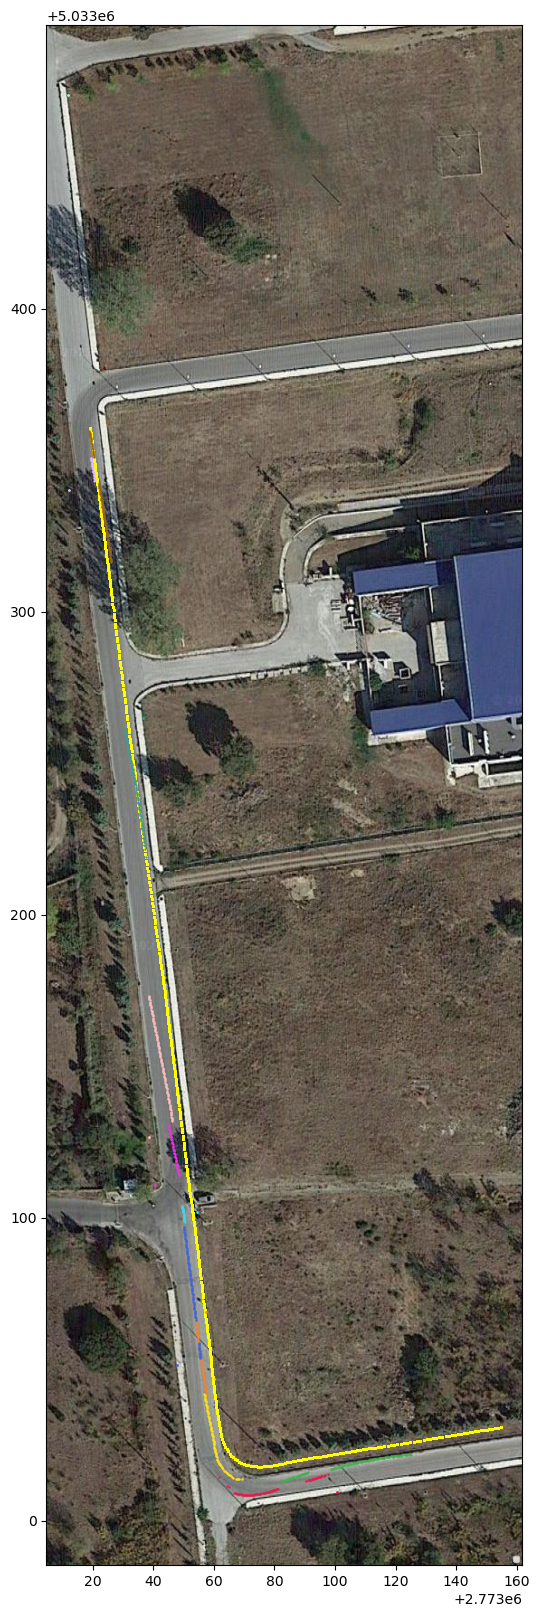

In [65]:
import matplotlib.pyplot as plt
import contextily as ctx

#load shapefiles and convert to tile EPSG 3857
gdf_obs = gpd.read_file('shapefiles/gps_new/gps_new.shp') #EPSG: 4326, to plot in tiles convert to EPSG 3857
gdf_obs = gdf_obs.set_crs('epsg:32634')
gdf_obs = gdf_obs.to_crs(epsg=3857)

gdf = gpd.read_file('shapefiles/kalman_new/kalman_new.shp') #EPSG: 4326, to plot in tiles convert to EPSG 3857
gdf = gdf.set_crs('epsg:32634')
gdf = gdf.to_crs(epsg=3857)

gdf_land = gpd.read_file('shapefiles/landmarks/landmarks.shp') #EPSG: 4326, to plot in tiles convert to EPSG 3857
gdf_land = gdf_land.set_crs('epsg:32634')
gdf_land = gdf_land.to_crs(epsg=3857)

gdf_lidar = gpd.read_file('shapefiles/lidar_new/lidar_new.shp') #EPSG: 4326, to plot in tiles convert to EPSG 3857
gdf_lidar = gdf_lidar.set_crs('epsg:32634')
gdf_lidar = gdf_lidar.to_crs(epsg=3857)

#plot in geopandas plot
# ax = gdf_obs.plot(figsize=(20, 20), alpha=1.0, color='yellow', markersize=0.5, label='GPS')
# ax = gdf.plot(ax=ax, alpha=1.0, color='red', markersize=0.5, label='EKF')
# ax = gdf_lidar.boundary.plot(ax=ax, alpha=1.0, color='black', markersize=0.5, label='Only from Lidar')
# ax = gdf_land.plot(ax=ax, color='green', markersize=5, label='Landmarks')

ax = gdf_obs.plot(figsize=(20, 20), alpha=1.0, color='yellow', markersize=0.5)
# ax = gdf.plot(ax=ax, alpha=1.0, color='red', markersize=0.5)
# Plot landmarks with their individual colors
for color in gdf_land['color'].unique():
    gdf_land[gdf_land['color'] == color].plot(ax=ax, color=color, markersize=1.0)
for color2 in gdf_lidar['color'].unique():
    gdf_lidar[gdf_lidar['color'] == color2].plot(ax=ax, color=color2, markersize=0.5)

ax.legend(loc='lower right', fontsize=5, frameon=True)
#ax.set_axis_off()

#Add contextily basemap
#ctx.add_basemap(ax, source=ctx.providers.HEREv3.satelliteDay(apiKey="HJnqnjPzpSKKD9uG9C2eoz3NO4pny87MkW_TK9uP2MA")) #HEREv3 maps
ctx.add_basemap(ax, source='http://mt0.google.com/vt/lyrs=s&hl=en&x={x}&y={y}&z={z}') #google maps
#ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=19) #openstreet maps

# plt.savefig('output_reordered_final_merge_map_1_qgis_2_ekfs_fix.png', format='png', dpi=600)
# plt.savefig('output_reordered_final_merge_map_1_qgis_10-10.png', format='png', dpi=600)
# plt.savefig('output_reordered_final_merge_map_1_qgis_fix.png', format='png', dpi=600)
# plt.savefig('output_reordered_final_merge_map_1_qgis_.png', format='png', dpi=600)
# plt.savefig('output_reordered_final_merge_map_1_qgis_rtk.png', format='png', dpi=600)
plt.savefig('output_reordered_final_merge_map_1_qgis_new.png', format='png', dpi=600)


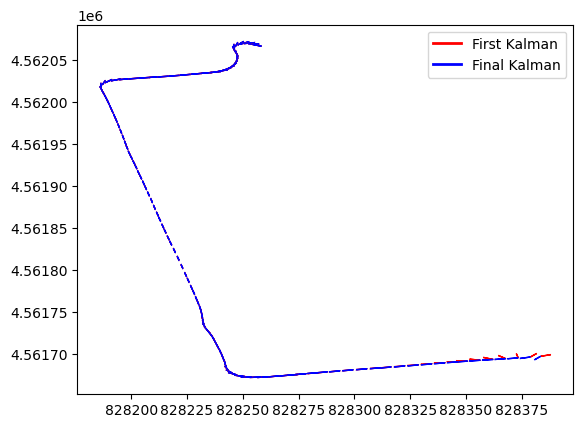

In [6]:
df = pd.read_csv('D:/Python_Projects/Extented-Kalman-Filter/fusion_camera_gps_imu_without_Eigen/cmake-build-debug/output_reordered_final_merge_2_ekfs.csv')
gps_x = df['easting']
gps_y = df['northing']
yaw = df['yaw']
state_x = df['state_x']
state_y = df['state_y']
state_yaw = df['state_yaw']  

#[12000:36000]
gps_x_n = gps_x.values[:12000]
gps_y_n = gps_y.values[:12000]
yaw_n = yaw.values[:12000]  # Extracting the yaw values
state_x_n = state_x.values[:12000]
state_y_n = state_y.values[:12000]
state_yaw_n = state_yaw.values[:12000]  # Extracting the yaw values

arrow_length = 5 #length arrow
for idx in range(0, 12000, 100):  
    line_1 = plt.arrow(gps_x_n[idx],gps_y_n[idx],  np.cos(yaw_n[idx])*arrow_length, np.sin(yaw_n[idx])*arrow_length, linewidth=1,  color="red")
    line_2 = plt.arrow(gps_x_n[idx],gps_y_n[idx],  np.cos(state_yaw_n[idx])*arrow_length, np.sin(state_yaw_n[idx])*arrow_length, linewidth=1,  color="blue")

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="red", lw=2),
                Line2D([0], [0], color="blue", lw=2)]
plt.legend(custom_lines, ['First Kalman', 'Final Kalman'])

# Save the plot
plt.savefig('output_reordered_final_merge_map_1_qgis_2_ekfs_output_arrows_plot.png', format='png', dpi=300)

# Show the plot
plt.show()